# Further Analysis

This notebook will generate some more detailed statistics about the Annotation Unit, and Worker scores. We will ensure to show this per niche group


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import ast
import csv

## Part 1: Generating the top 3 UAS scores

We will start of by showing the top 3 UAS scores per annotated photograph. This is will then be shown per niche group. To do that, we first define a couple of functions that will ensure we get the top 3 most prevalent annotations per photograph per niche group.

This function selects the top 3 items from the UAS scores per photograph, which are stored in a Python dict format

In [285]:
def get_top_3(uas_dict):

    top_3_values = sorted(uas_dict.items(), key=lambda x: x[1], reverse=True)[:3]
    top_3_dict = {key: value for key, value in top_3_values}
    return top_3_dict


The function below ensures that we properly format the dicts per column. The dicts containing all of the scores are stored in string format. The ast library alllows us to transform this string in a proper dict format

In [286]:
def get_uas(df):

    uas_list = []
    uas_dict = {}
    unit_int = 101


    # Assuming your DataFrame is named 'df' with a column named 'data'

    df['unit_annotation_score'] = df['unit_annotation_score'].str.replace("‘", "'").str.replace("’", "'")
    df['unit_annotation_score'] = df['unit_annotation_score'].apply(ast.literal_eval)


    data_list = df['unit_annotation_score'].tolist()

    for item in data_list:
        new_dict = get_top_3(item)
        uas_dict["Unit " + str(unit_int)] = new_dict
        unit_int += 1

    return uas_dict


The function below removes the starting and trailing characters to ensure that we can properly format the dictionaries with the scores

In [305]:
def fix_format(df):
    df['unit_annotation_score'] = df['unit_annotation_score'].str.replace('Counter(', '').str[:-1]

    return df

We then select the root folder where the UAS scores are stored per niche group

In [ ]:
root_directory = 'data/results/Grouped_results/UAS'

We loop through all of the UAS scores per niche group, and ensure that through the defined functions the top 3 UAS scores are generated and stored in proper data formats. 

In [318]:
# Use os.walk to recursively traverse the directory tree
for root, _, files in os.walk(root_directory):
    for file_name in files:
        # Get the full path of the file
        file_path = os.path.join(root, file_name)
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path, encoding= 'unicode_escape')
            df = fix_format(df)
            top_3_uas = get_uas(df)
            top_3_uas = pd.DataFrame.from_dict(top_3_uas)
            top_3_uas.to_csv('data/results/Grouped_results/Top_3_UAS/Top_3_' + file_name)


        

## Part 2: Generating the top 3 annotations per Niche group over all annotated photographs
We then generated the top 3 terms annotated per niche group

We first select the root folder

In [319]:
root_directory = 'data/results/Grouped_results/AQS'



We again loop through all of files, and store the top 3 annotations per niche group into seperate csv files

In [325]:
for root, _, files in os.walk(root_directory):
    for file_name in files:
        # Get the full path of the file
        file_path = os.path.join(root, file_name)
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path, encoding= 'unicode_escape')
            sorted_df = df.sort_values('output.Answer', ascending=False)
            top_3_annotations = sorted_df.head(3)
            top_3_annotations.to_csv('data/results/Grouped_results/Top_3_annotations/Top_3_' + file_name)
            # print(top_3_annotations.head())




## Part 3: Generating the top 10 selected annotation
The function below shows how we can generate the top 10 annotations supplied by all of the annotators

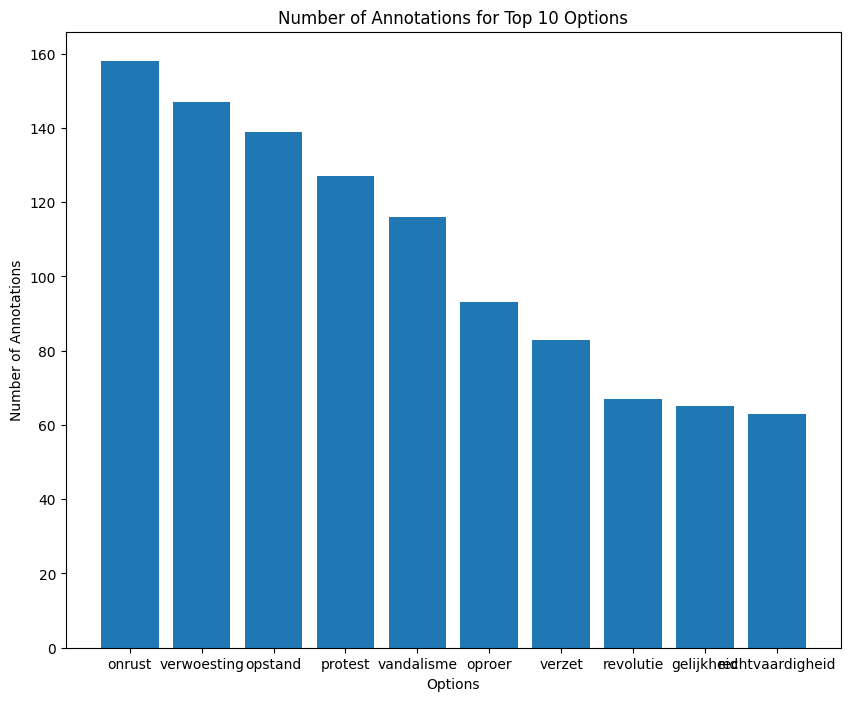

In [ ]:
# Example data
annotation_options = df['Options']
annotations = df['Counts']

plt.figure(figsize=(10, 8)) 
# Sort the data in descending order
sorted_data = sorted(zip(annotation_options, annotations), key=lambda x: x[1], reverse=True)

# Extract the top 10 options and annotations
top_options = [option for option, _ in sorted_data[:10]]
top_annotations = [annotation for _, annotation in sorted_data[:10]]

# Generate numerical labels
numerical_labels = range(1, len(top_options) + 1)

# Create a bar chart with numerical labels
plt.bar(numerical_labels, top_annotations)

# Customize the plot
plt.xlabel('Options')
plt.ylabel('Number of Annotations')
plt.title('Number of Annotations for Top 10 Options')

# Set the x-tick positions and labels
plt.xticks(numerical_labels, top_options)

# Display the plot
plt.show()

## Part 4: Generating Scatterplots displaying the WWA scores per niche group

We first load the CrowdTruth results for the workers into a Pandas DataFrame

In [ ]:
df = pd.read_csv('data/results/workers/results.csv', sep=';')

We then first generate the WWA scores per connection type. The WWA scores for the workers show which workers consistently made similar annotations. Participants with similar scores made similar annotations per annotated photograph

In [ ]:

# Scatterplot for the first annotation score (color 1)
sns.scatterplot(data=df, x='Connection_type', y='wwa', color='blue', label='wwa')

# Scatterplot for the second annotation score (color 2)
# sns.scatterplot(data=df, x='Connection_type', y='wqs', color='red', label='wqs')


# Set x-axis tick positions to 1
plt.xticks(range(0, 4), ['No_connection', 'Cultural', 'Personal_interest', 'Indirect'])


# Set labels and title
plt.xlabel('Connection type')
plt.ylabel('WWA Scores')
plt.title('Distribution of the WWA scores per connection type')


# Display the legend
plt.legend()

# Display the plot
plt.show()

We then generate the scatterplot for the WWA scores per conenction level

In [ ]:

# Scatterplot for the first annotation score (color 1)
sns.scatterplot(data=df, x='Connection_level', y='wwa', color='blue', label='wwa')

# Scatterplot for the second annotation score (color 2)
# sns.scatterplot(data=df, x='Connection_level', y='wqs', color='red', label='wqs')

# Set x-axis tick positions to 1
plt.xticks(range(1, 6), ['Very Weak', 'Weak', 'Neutral', 'Strong', 'Very Strong'])



# Set labels and title
plt.xlabel('Connection_level')
plt.ylabel('Annotation Scores')
plt.title('Distribution of WWA scores per connection level')

# Display the legend
# plt.legend()

# Display the plot
plt.show()

To get a better understanding of the distribution of the WWA scores, we ensure that we ran some additional statistical tests 

We first load the worker results again into a dataframe and compute the connection level into a format 
From: (1-5) 
To: (Very Weak- Very Strong)

In [45]:
df = pd.read_csv('data/results/workers/results.csv', sep=';')

original_values = [1, 2, 3, 4, 5]
new_values = ["Very Weak", "Weak", "Neutral", "Strong", "Very Strong"]

for original, new in zip(original_values, new_values):
    df['Connection_level'] = df['Connection_level'].replace(original, new)


df.drop(['Connection_type'], axis=1, inplace=True)


We then create the function that generates all of the necessary results

In [46]:
import numpy as np

def calc_deviations(df):

    deviations = {}

    deviations['Mean']= np.mean(df['wwa'])
    deviations['Median'] = np.median(df['wwa'])
    deviations['mode'] = df['wwa'].mode().values[0]  # Assumes a single mode, can handle multiple modes as well

    # Measures of Dispersion
    deviations['range'] = np.ptp(df['wwa'])  # Equivalent to max - min
    deviations['variance'] = np.var(df['wwa'])
    deviations['std_deviations'] = np.std(df['wwa'])
    deviations['iqr'] = np.percentile(df['wwa'], 75) - np.percentile(df['wwa'], 25)

    return deviations

The cell below ensures that we first get all of the results per connection level

In [53]:
grouped = df.groupby('Connection_level')

# Iterate over the groups and create separate DataFrames for each group
dataframes = {}
for group_name, group_df in grouped:
    dataframes[group_name] = group_df.copy()




wwa_deviations_VW        = calc_deviations(dataframes['Very Weak'])
wwa_deviations_W         = calc_deviations(dataframes['Weak'])
wwa_deviations_N         = calc_deviations(dataframes['Neutral'])
wwa_deviations_S         = calc_deviations(dataframes['Strong'])
wwa_deviations_VS        = calc_deviations(dataframes['Very Strong'])


wwa_deviations = {}
wwa_deviations['Very Weak']   = wwa_deviations_VW
wwa_deviations['Weak']        = wwa_deviations_W
wwa_deviations['Neutral']     = wwa_deviations_N
wwa_deviations['Strong']      = wwa_deviations_S
wwa_deviations['Very Strong'] = wwa_deviations_VS





The results are then written to individual CSV files

In [55]:
for k, v in wwa_deviations.items():
    file_path = 'data/results/workers/Deviations/Per_level/WWA_deviations_' + str(k) + '.csv'
    
    # Write the dictionary values to the CSV file
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(v.keys())  # Write the header row
        writer.writerow(v.values())  # Write the data row

Consequently, we do the exact same for the connection types

In [ ]:
df = pd.read_csv('data/results/workers/results.csv', sep=';')

grouped = df.groupby('Connection_type')

# Iterate over the groups and create separate DataFrames for each group
dataframes = {}
for group_name, group_df in grouped:
    dataframes[group_name] = group_df.copy()


# dataframes['Culturele verbondenheid']


wwa_deviations_cultural          = calc_deviations(dataframes['Culturele verbondenheid'])
wwa_deviations_no_connection     = calc_deviations(dataframes['Geen directe verbondenheid met de gebeurtenis'])
wwa_deviations_personal_interest = calc_deviations(dataframes['Persoonlijke interesse'])
wwa_deviations_indirect        = calc_deviations(dataframes['Indirecte persoonlijke betrokkenheid of ervaring (Middels een kennis of familielid)'])


wwa_deviations = {}
wwa_deviations['Cultural'] = wwa_deviations_cultural
wwa_deviations['No_connection'] = wwa_deviations_no_connection
wwa_deviations['Personal_interest'] = wwa_deviations_personal_interest
wwa_deviations['Indirect'] = wwa_deviations_indirect

# Access the separate DataFrames based on the group name



Cultural
No_connection
Personal_interest
Indirect


Again, the results are written to individual CSV files

In [ ]:

for k, v in wwa_deviations.items():
    file_path = 'data/results/workers/Deviations/Per_type/WWA_deviations_' + str(k) + '.csv'
    
    # Write the dictionary values to the CSV file
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(v.keys())  # Write the header row
        writer.writerow(v.values())  # Write the data row
